In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load train and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

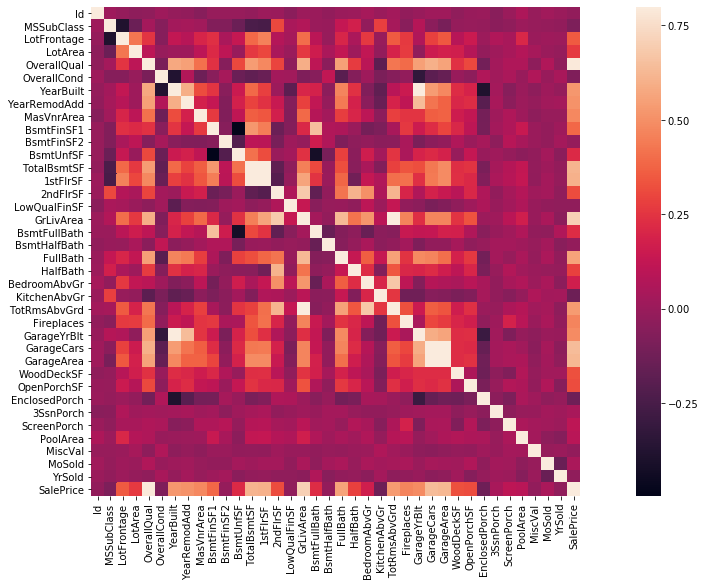

In [4]:
#Feature selection by looking through correlations
correlation_matrix = train.corr()
f, ax = plt.subplots(figsize = (20, 9))
sns.heatmap(correlation_matrix, vmax=0.8, square=True)
# From the graph below, it seems that OverallQual, GrLivArea, 
# GarageCars, TotalBsmtSF, FullBath, TotRmsAbvGrd, and YearBuilt have
# relative higher correlations with SalePrice. 

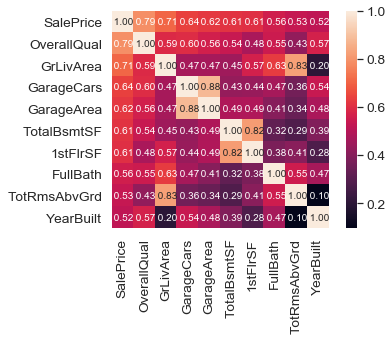

In [5]:
# Correlations between variables selected 
## Correlation Matrix
k = 10
cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                square=True, fmt=' .2f', annot_kws={'size':10}, yticklabels
                =cols.values, xticklabels=cols.values)
plt.show()

In [6]:
# From the matrix above, we can see the correlations between the variables
# selected. Apparently, GrLivArea & TotRmsAbvGrd, GarageCars & GarageArea,
# TotalBsmtSF & 1stFlrSF have relative high correlations. 

In [7]:
# Train test split
from sklearn.model_selection import train_test_split
cols = ['OverallQual','GrLivArea', 'GarageCars',
        'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
X = train[cols]
y = train['SalePrice']
train_X,test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

In [8]:
# Perform train dataframe with Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
Model1= RandomForestRegressor(n_estimators=400)
Model1.fit(train_X, train_y)
predict_y = Model1.predict(test_X)
print(predict_y)

[142200.875      305534.5625     121813.1875     168320.75
 291753.27        80707.20833333 198922.3        153321.6875
  80327.875      115966.73       161165.925      119926.
  97837.875      220876.225      187728.125      118223.6875
 200535.5        134264.875      119350.1875     203035.65
 169502.05       236635.3625     172841.4975     117229.05555556
 187146.925      167245.103125   201756.0475     102415.
 181222.5        199794.39       110865.         241035.21
 179885.265      106845.20833333 260627.4975     146194.375
 155626.835      208856.3725     332688.6575     108790.66666667
 127859.625      229347.0575     120652.06666667 384232.7
 135045.15       159558.5925     126112.30952381 116905.72916667
 433487.89       149839.13       117147.66666667 182465.4
 129400.234375   328304.57       144408.39821429 239906.425
 198917.8875     152310.         149870.5        107412.04166667
  74227.         139749.875      293512.3825     292381.6875
 301986.155      212318.      

In [9]:
sum(abs(predict_y - test_y))/len(predict_y)

20611.632822290187

In [10]:
# Feature Importance
import pandas as pd

feature_importances = pd.DataFrame(Model1.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

              importance
OverallQual     0.555486
GrLivArea       0.171610
TotalBsmtSF     0.105297
GarageCars      0.065919
YearBuilt       0.059592
TotRmsAbvGrd    0.031639
FullBath        0.010456


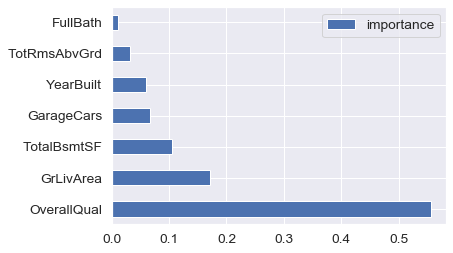

In [11]:
# Feature Important Graph
feature_importances.plot(kind='barh')

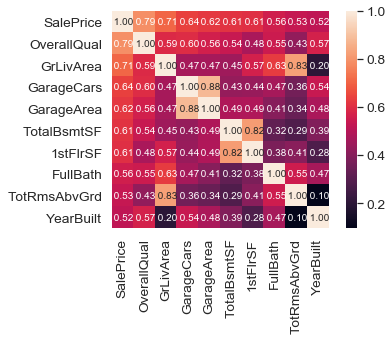

In [13]:
 ## Correlations
k = 10
cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                square=True, fmt=' .2f', annot_kws={'size':10}, yticklabels
                =cols.values, xticklabels=cols.values)
plt.show()